In [ ]:
!git clone https://github.com/Karandh1r/TextMiningAssignment-1.git

Cloning into 'TextMiningAssignment-1'...
remote: Enumerating objects: 244, done.
remote: Counting objects: 100% (244/244), done.
remote: Compressing objects: 100% (177/177), done.
remote: Total 244 (delta 86), reused 217 (delta 59), pack-reused 0
Receiving objects: 100% (244/244), 16.72 MiB | 15.02 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [ ]:
!pip install pyldavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=a360506cd999f59d174556374df50ff31495f18327cc2778a5f9ceddb216271f
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=04f5fa3f3d071076553e3bb75e91718369b2b2cf5be69246255becc0691847aa
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyldavis sklearn


In [1]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/karandhir/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [1]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
import pyLDAvis
import pyLDAvis.sklearn   
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=DeprecationWarning)
  

/Users/karandhir/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [2]:
le = LabelEncoder()
ohe = OneHotEncoder()

file_name_movies = 'moviedata.csv'
file_movie_reviews = 'reviewdata.csv'

df_movie_reviews = pd.read_csv(file_movie_reviews)
print(df_movie_reviews.columns)

Index(['MovieId', 'UserReviews'], dtype='object')


In [3]:
def lemmatize_words(text):
        lemmatizer = WordNetLemmatizer()
        words = text.split()
        words = [lemmatizer.lemmatize(word) for word in words]
        return ' '.join(words)

def stemming_words(text):
        ps = PorterStemmer()
        words = text.split()
        words = [ps.stem(word) for word in words]
        return ' '.join(words) 

df_movie_reviews['UserReviews'] = df_movie_reviews['UserReviews'].apply(lemmatize_words)
df_movie_reviews['UserReviews'] = df_movie_reviews['UserReviews'].apply(stemming_words) 

vectorizer = CountVectorizer(stop_words='english',max_features=50)
X = vectorizer.fit_transform(df_movie_reviews['UserReviews'])
column_names = vectorizer.get_feature_names_out()
count_vec_columns = column_names
vectorized_df = pd.DataFrame(X.toarray(),columns=column_names)
num_topics = 7
lda_model_DH = LatentDirichletAllocation(n_components=num_topics, 
                                         max_iter=100, learning_method='online')
LDA_DH_Model = lda_model_DH.fit_transform(vectorized_df)
print("SIZE: ", LDA_DH_Model.shape) 

def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic:  ", idx)  
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
print_topics(lda_model_DH, vectorizer, 15)
word_topic = np.array(lda_model_DH.components_)
word_topic = word_topic.transpose()
num_top_words = 15
vocab_array = np.asarray(column_names)
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model_DH, X, vectorizer)


SIZE:  (879, 7)
Topic:   0
[('hi', 170.7056003951391), ('woman', 114.24066572796704), ('veri', 75.54178107980881), ('movi', 75.40492993846685), ('ha', 71.36204594255256), ('love', 63.27473092913083), ('thi', 46.159942214596576), ('just', 39.56896091213344), ('mani', 25.20157883093245), ('time', 24.703878375608117), ('best', 24.62175734162817), ('stori', 18.272082610678765), ('watch', 17.38535431568025), ('want', 13.72071378771336), ('end', 12.078953397389212)]
Topic:   1
[('like', 166.29508363170928), ('feel', 89.74939122464562), ('thi', 81.0732218352309), ('peopl', 76.19277106121515), ('don', 75.77196182564626), ('ha', 71.48614148083517), ('life', 65.94392822726114), ('just', 64.36086314720603), ('stori', 64.1987313913359), ('way', 62.9231794604607), ('charact', 58.90642714449197), ('know', 54.79448479749592), ('good', 52.09814490510429), ('work', 51.184843091349286), ('mani', 49.70091227170701)]
Topic:   2
[('action', 117.70283577100396), ('harley', 111.78636707868868), ('quinn', 86.

/Users/karandhir/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/karandhir/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LatentDirichletAllocation was fitted with feature names
  warnings.warn(
/Users/karandhir/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/karandhir/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.129147 -0.014283       1        1  26.667910
5     -0.133351  0.079501       2        1  21.201585
1     -0.068612  0.047047       3        1  16.714263
4     -0.093234 -0.054792       4        1  12.757503
0     -0.071182  0.143778       5        1   9.450006
3      0.119258 -0.361213       6        1   7.577769
2      0.376268  0.159962       7        1   5.630964, topic_info=      Term        Freq       Total Category  logprob  loglift
13    film  546.000000  546.000000  Default  30.0000  30.0000
44      wa  677.000000  677.000000  Default  29.0000  29.0000
16   great  164.000000  164.000000  Default  28.0000  28.0000
19      hi  174.000000  174.000000  Default  27.0000  27.0000
1   action  126.000000  126.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
47     way    0.153142  115.413956   Topic7  -8.0916  -3.7480
13    film    0.153151  546.816006   Topic7  -8.0916  -5.3036
40   thing    0.153136  119.948931   Topic7  -8.0917  -3.7866
20    just    0.153044  232.781977   Topic7  -8.0923  -4.4502
48   woman    0.153021  125.970488   Topic7  -8.0924  -3.8363

[274 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         1  0.300431     act
0         2  0.200287     act
0         3  0.433956     act
0         6  0.055635     act
1         7  0.996163  action
...     ...       ...     ...
48        4  0.071445   woman
48        5  0.920851   woman
49        2  0.195925    work
49        3  0.666145    work
49        5  0.130617    work

[174 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 2, 5, 1, 4, 3])

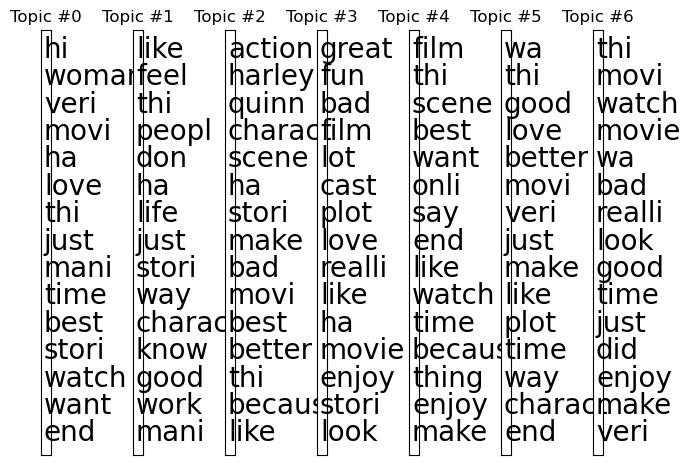

In [6]:
fontsize_base = 20

for t in range(num_topics):
    plt.subplot(1, num_topics, t + 1) 
    plt.ylim(0, num_top_words + 0.5) 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1] 
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base)

plt.tight_layout()
plt.show()